In [205]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [206]:
raw_data = pd.read_csv("train.csv")

In [207]:
print(raw_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [208]:
raw_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [209]:
col_list = []
for col in raw_data.columns:
    if raw_data[col].count() == 1460:
        col_list.append(col)
    else:
        pass

In [210]:
df_house_price = raw_data[col_list]

In [211]:
df_house_price.shape

(1460, 62)

In [212]:
df_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   LotShape       1460 non-null   object
 6   LandContour    1460 non-null   object
 7   Utilities      1460 non-null   object
 8   LotConfig      1460 non-null   object
 9   LandSlope      1460 non-null   object
 10  Neighborhood   1460 non-null   object
 11  Condition1     1460 non-null   object
 12  Condition2     1460 non-null   object
 13  BldgType       1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  OverallQual    1460 non-null   int64 
 16  OverallCond    1460 non-null   int64 
 17  YearBuilt      1460 non-null   int64 
 18  YearRemodAdd   1460 non-null

In [213]:
# 1 Story, 1-1/2, 2, 2-1/2, Split, Duplex, PUD

In [214]:
# 20	1-STORY 1946 & NEWER ALL STYLES
#         30	1-STORY 1945 & OLDER
#         40	1-STORY W/FINISHED ATTIC ALL AGES
#         45	1-1/2 STORY - UNFINISHED ALL AGES
#         50	1-1/2 STORY FINISHED ALL AGES
#         60	2-STORY 1946 & NEWER
#         70	2-STORY 1945 & OLDER
#         75	2-1/2 STORY ALL AGES
#         80	SPLIT OR MULTI-LEVEL
#         85	SPLIT FOYER
#         90	DUPLEX - ALL STYLES AND AGES
#        120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
#        150	1-1/2 STORY PUD - ALL AGES
#        160	2-STORY PUD - 1946 & NEWER
#        180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
#        190	2 FAMILY CONVERSION - ALL STYLES AND AGES

In [215]:
numeric_to_cat_cols = ['MoSold', 'YrSold', 'YearBuilt', 'YearRemodAdd', 'MSSubClass', 'OverallQual', \
                       'OverallCond']
df_house_price[numeric_to_cat_cols] = df_house_price[numeric_to_cat_cols].astype("category") 

/home/monish/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [216]:
sold_age = 2020 - df_house_price['YrSold'].astype('int64')

In [217]:
age_porpty = 2020 - df_house_price['YearBuilt'].astype('int64')

In [218]:
df_house_price['age_porpty'] = age_porpty

/home/monish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [219]:
df_house_price['sold_age'] = sold_age

/home/monish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<h1> <center><u>Exploration through Visualization</u></center></h1>

### Muticollinearity Analysis

In [220]:
col_pairplot = ["YearBuilt","1stFlrSF","TotalBsmtSF","GarageArea","SalePrice","LotArea", "sold_age","age_porpty"]

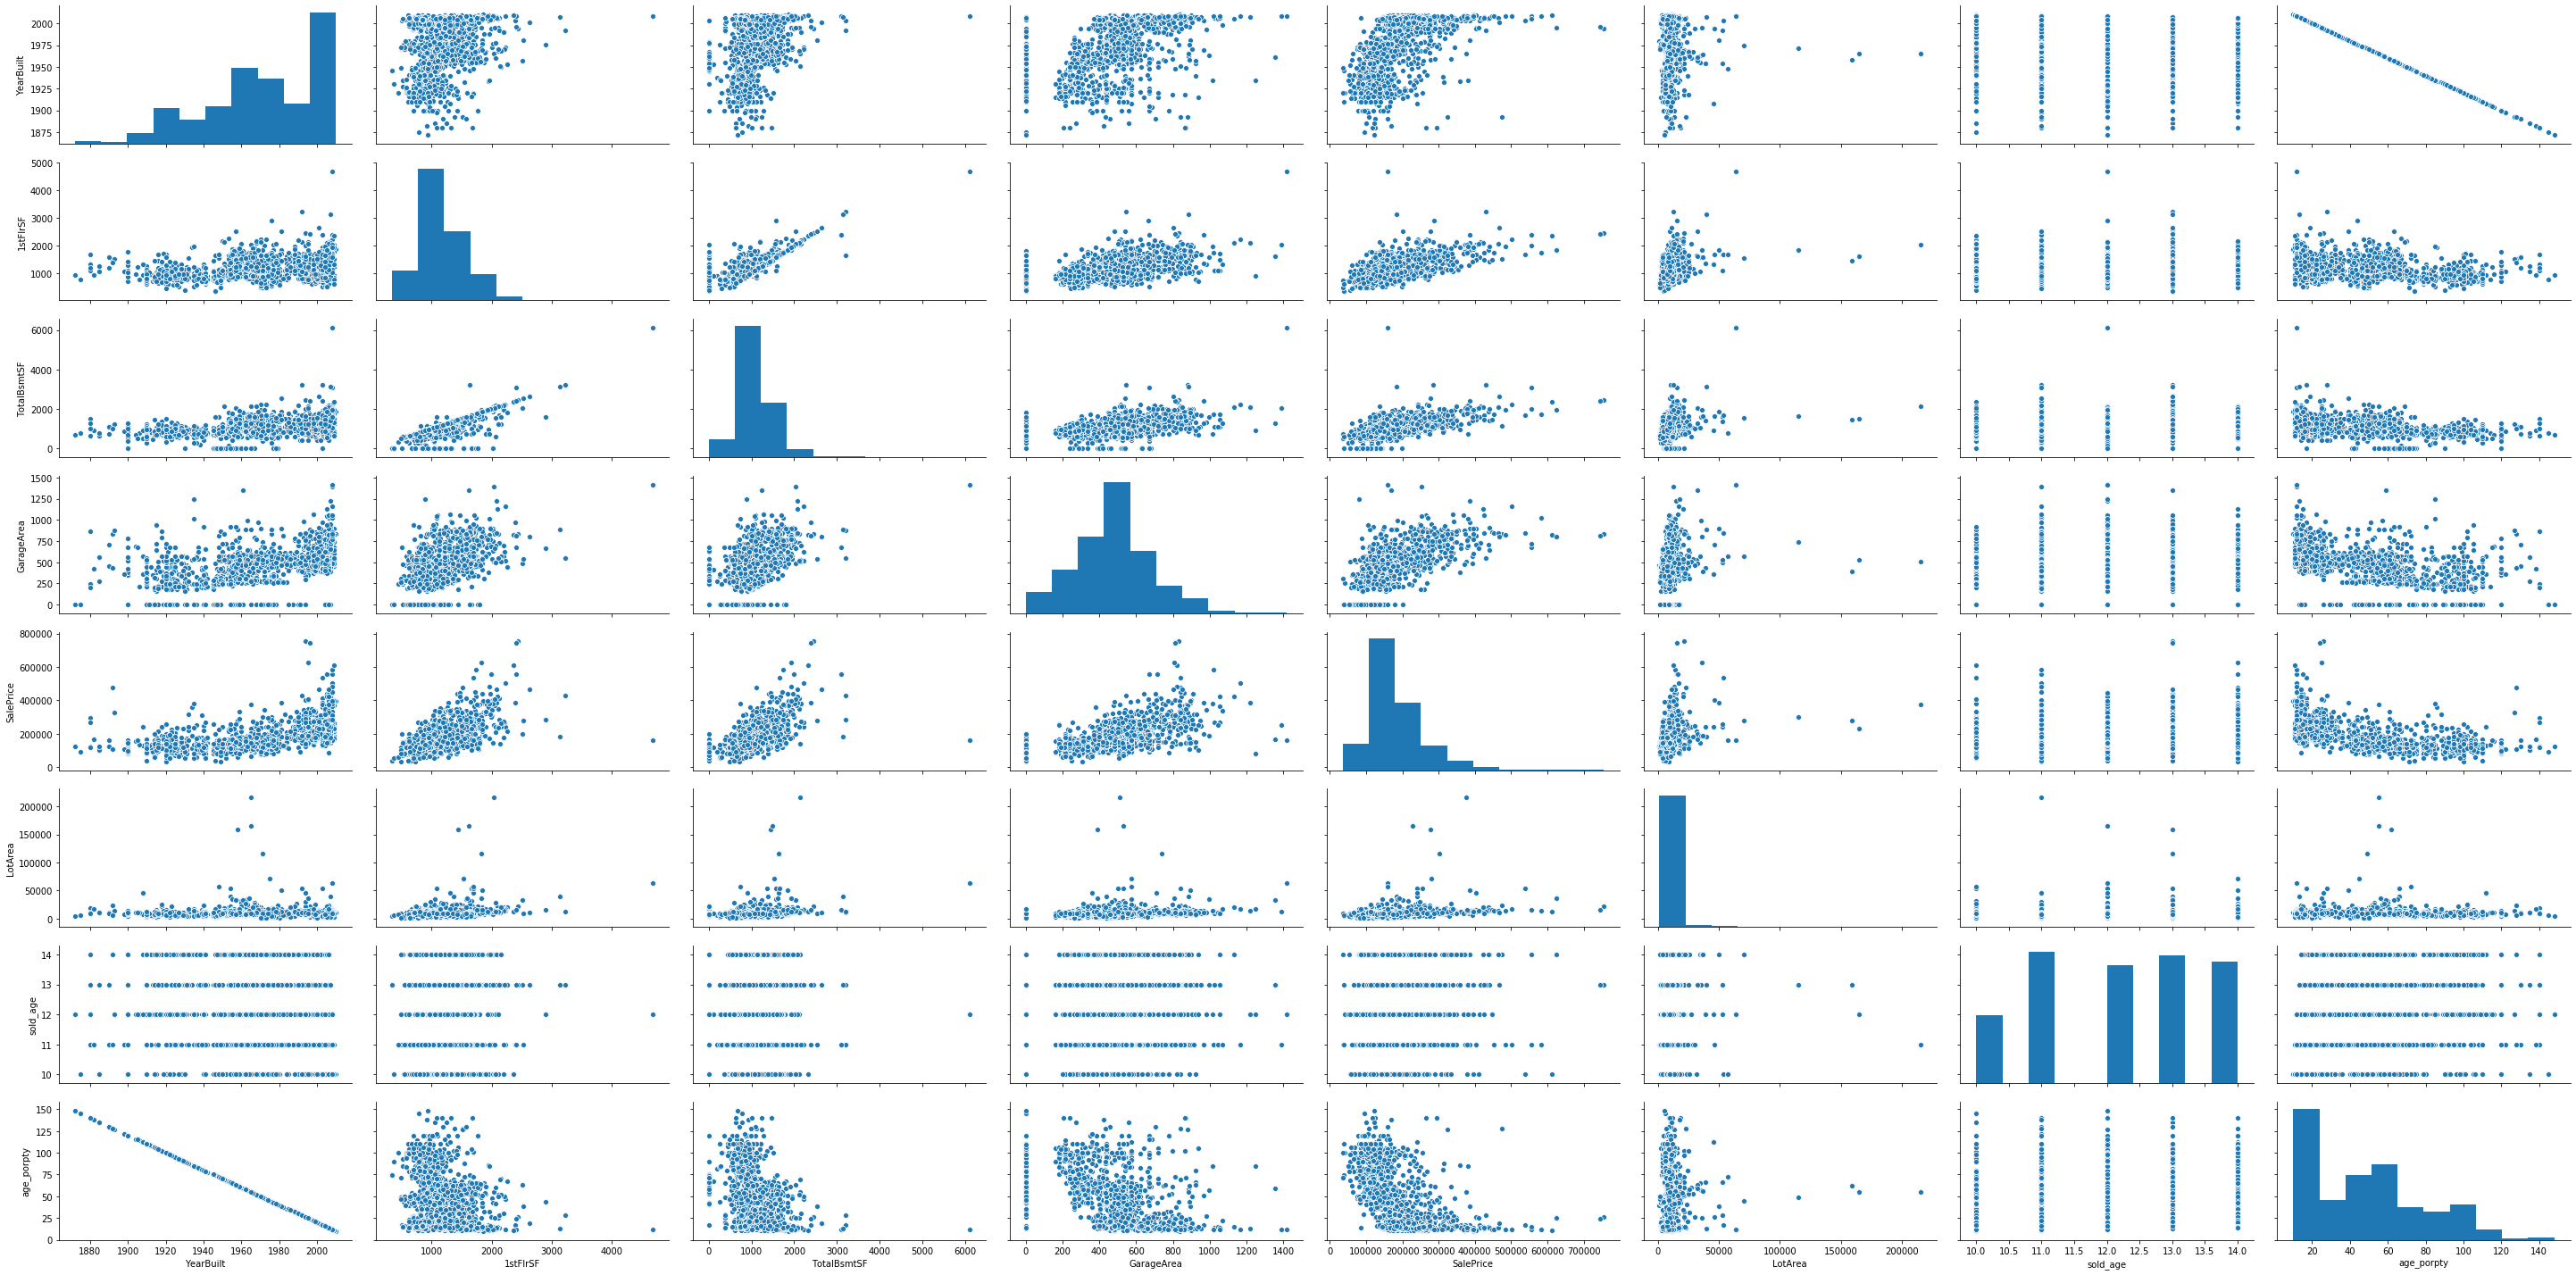

In [221]:
sns.pairplot(df_house_price[col_pairplot], aspect=2)

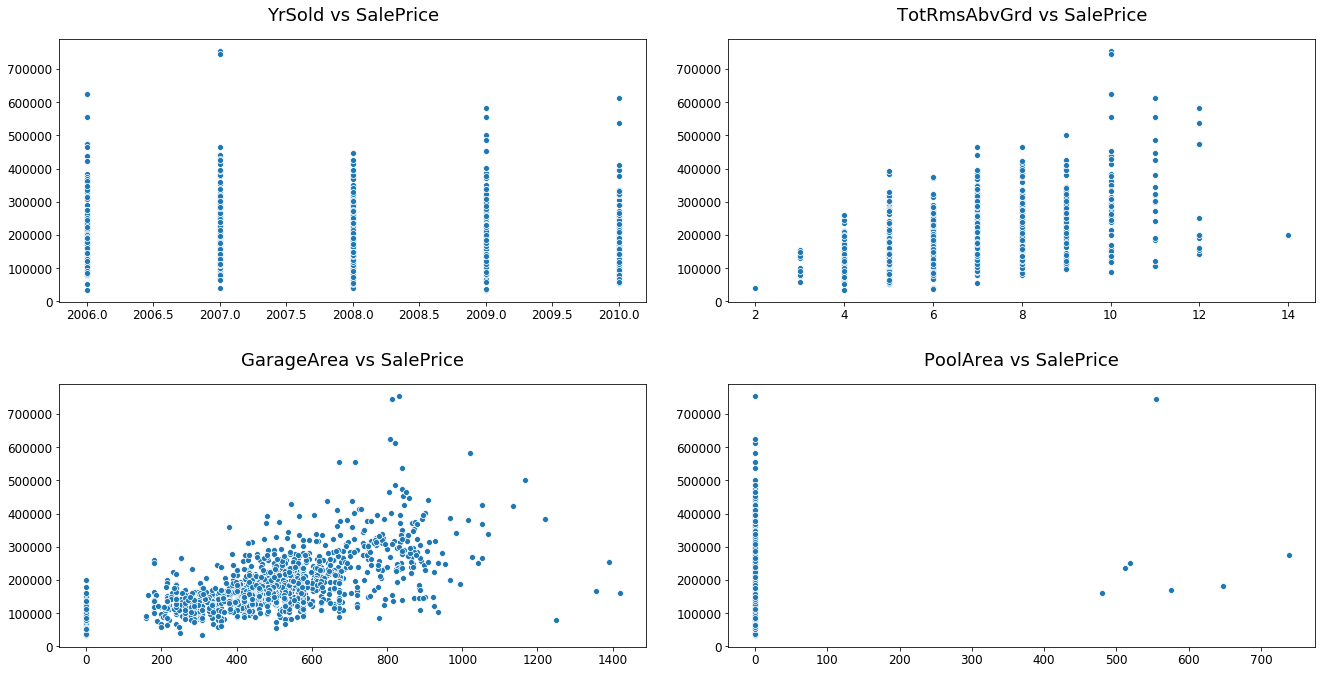

In [222]:
ASP_RATIO = (19,10)
fig_3, ax_3 = plt.subplots(2,2,figsize=ASP_RATIO)
sns.scatterplot(x='YrSold', y='SalePrice', data=df_house_price, ax=ax_3[0][0]);
sns.scatterplot(x='TotRmsAbvGrd', y='SalePrice', data=df_house_price, ax=ax_3[0][1])
sns.scatterplot(x='GarageArea', y='SalePrice', data=df_house_price, ax=ax_3[1][0])
sns.scatterplot(x='PoolArea', y='SalePrice', data=df_house_price, ax=ax_3[1][1])

label_fig_9 = {'plot_title': 'YrSold vs SalePrice',
            'pad':18,
            'ax_fontsize':14,
            't_fontsize':18,
            'labelpad':20,
            'labelsize':12,
            'ax_obj':ax_3[0][0]
           }

label_fig_10 = {'plot_title': 'TotRmsAbvGrd vs SalePrice',
            'pad':18,
            'ax_fontsize':14,
            't_fontsize':18,
            'labelpad':20,
            'labelsize':12,
            'ax_obj':ax_3[0][1]
           }

label_fig_11 = {'plot_title': 'GarageArea vs SalePrice',
            'pad':18,
            'ax_fontsize':14,
            't_fontsize':18,
            'labelpad':20,
            'labelsize':12,
            'ax_obj':ax_3[1][0]
           }

label_fig_12 = {'plot_title': 'PoolArea vs SalePrice',
            'pad':18,
            'ax_fontsize':14,
            't_fontsize':18,
            'labelpad':20,
            'labelsize':12,
            'ax_obj':ax_3[1][1]
           }


configure_plot(**label_fig_9);
configure_plot(**label_fig_10);
configure_plot(**label_fig_11);
configure_plot(**label_fig_12);
fig_3.tight_layout(pad=3.0)


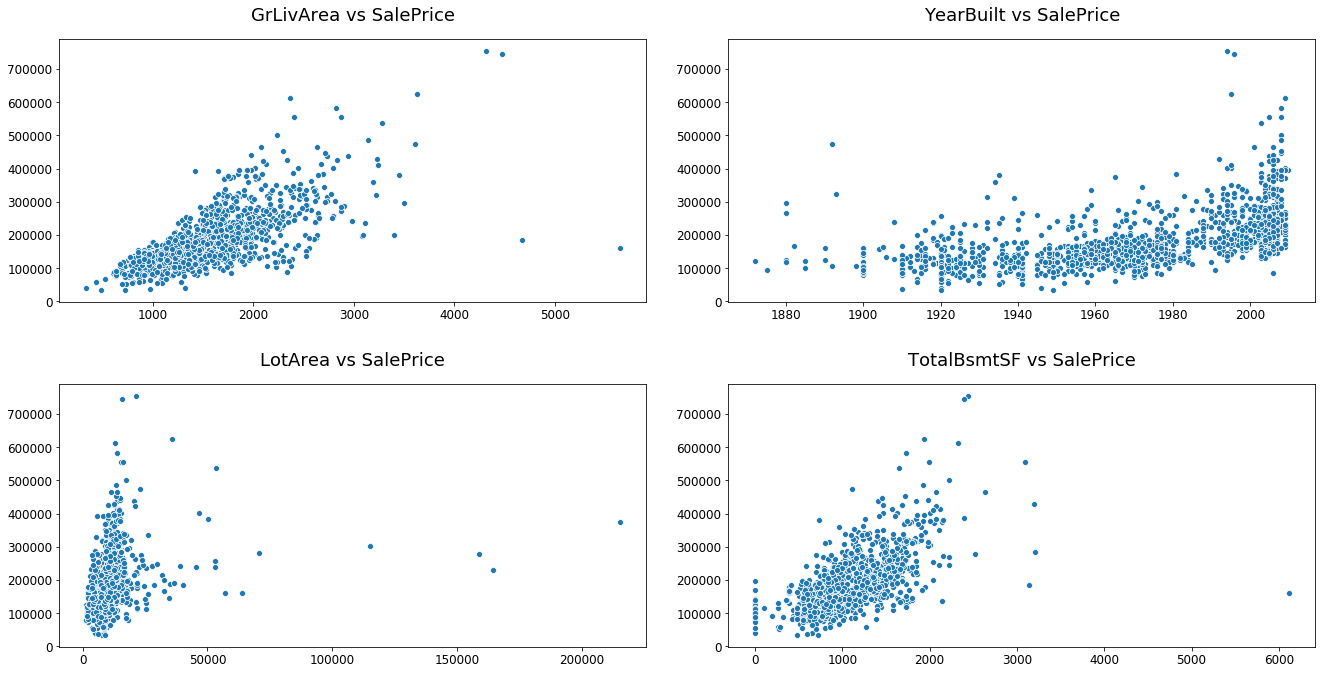

In [223]:
ASP_RATIO = (19,10)
fig_4, ax_4 = plt.subplots(2,2,figsize=ASP_RATIO)
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_house_price, ax=ax_4[0][0])
sns.scatterplot(x='YearBuilt', y='SalePrice', data=df_house_price, ax=ax_4[0][1])
sns.scatterplot(x='LotArea', y='SalePrice', data=df_house_price, ax=ax_4[1][0])
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=df_house_price, ax=ax_4[1][1])


label_fig_10 = {'plot_title': 'GrLivArea vs SalePrice',
            'pad':18,
            'ax_fontsize':14,
            't_fontsize':18,
            'labelpad':20,
            'labelsize':12,
            'ax_obj':ax_4[0][0]
           }

label_fig_11 = {'plot_title': 'YearBuilt vs SalePrice',
            'pad':18,
            'ax_fontsize':14,
            't_fontsize':18,
            'labelpad':20,
            'labelsize':12,
            'ax_obj':ax_4[0][1]
           }

label_fig_12 = {'plot_title': 'LotArea vs SalePrice',
            'pad':18,
            'ax_fontsize':14,
            't_fontsize':18,
            'labelpad':20,
            'labelsize':12,
            'ax_obj':ax_4[1][0]
           }

label_fig_13 = {'plot_title': 'TotalBsmtSF vs SalePrice',
            'pad':18,
            'ax_fontsize':14,
            't_fontsize':18,
            'labelpad':20,
            'labelsize':12,
            'ax_obj':ax_4[1][1]
           }


configure_plot(**label_fig_10);
configure_plot(**label_fig_11);
configure_plot(**label_fig_12);
configure_plot(**label_fig_13);
fig_4.tight_layout(pad=3.0)

In [224]:
cont_cols = ['LotArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF',
'GrLivArea','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch',\
             'PoolArea','MiscVal','SalePrice']


### Outliers Analysis

In [225]:
def configure_plot(plot_title=None, pad=None, t_fontsize=None, ax_fontsize=None, labelpad=None, labelsize=None,\
               x_label=None, y_label=None, ax_obj=None):
    ax_obj.set_title(plot_title, pad=pad, fontsize=t_fontsize);
    ax_obj.set_xlabel(x_label, fontsize=ax_fontsize, labelpad=labelpad);
    ax_obj.set_ylabel(y_label, fontsize=ax_fontsize, labelpad=labelpad);
    ax_obj.tick_params(axis='both', which='major', labelsize=labelsize);
#     ax_obj.xscale(x_scale)

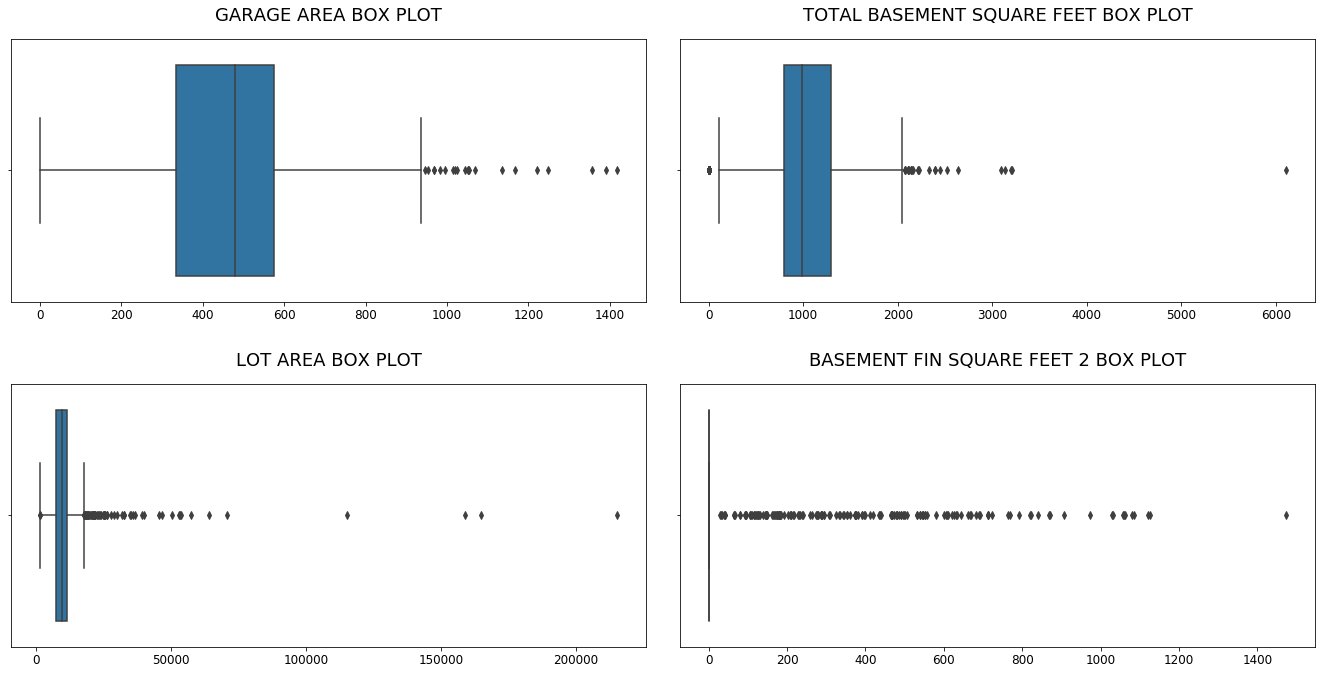

In [226]:
ASP_RATIO = (19,10)
fig_1, ax_1 = plt.subplots(2,2,figsize=ASP_RATIO)

sns.boxplot(df_house_price['GarageArea'], ax=ax_1[0][0])
sns.boxplot(df_house_price['TotalBsmtSF'], ax=ax_1[0][1])
sns.boxplot(df_house_price['LotArea'], ax=ax_1[1][0])
sns.boxplot(df_house_price['BsmtFinSF2'], ax=ax_1[1][1])

label_fig_1 = {'plot_title': 'GARAGE AREA BOX PLOT',
            'pad':18,
            'ax_fontsize':14,
            't_fontsize':18,
            'labelpad':20,
            'labelsize':12,
            'ax_obj':ax_1[0][0]
           }

label_fig_2 = {'plot_title': 'TOTAL BASEMENT SQUARE FEET BOX PLOT',
            'pad':18,
            'ax_fontsize':14,
            't_fontsize':18,
            'labelpad':20,
            'labelsize':12,
            'ax_obj':ax_1[0][1]
           }

label_fig_3 = {'plot_title': 'LOT AREA BOX PLOT',
            'pad':18,
            'ax_fontsize':14,
            't_fontsize':18,
            'labelpad':20,
            'labelsize':12,
            'ax_obj':ax_1[1][0]
           }

label_fig_4 = {'plot_title': 'BASEMENT FIN SQUARE FEET 2 BOX PLOT',
            'pad':18,
            'ax_fontsize':14,
            't_fontsize':18,
            'labelpad':20,
            'labelsize':12,
            'ax_obj':ax_1[1][1]
           }


configure_plot(**label_fig_1);
configure_plot(**label_fig_2);
configure_plot(**label_fig_3);
configure_plot(**label_fig_4);
fig_1.tight_layout(pad=3.0)

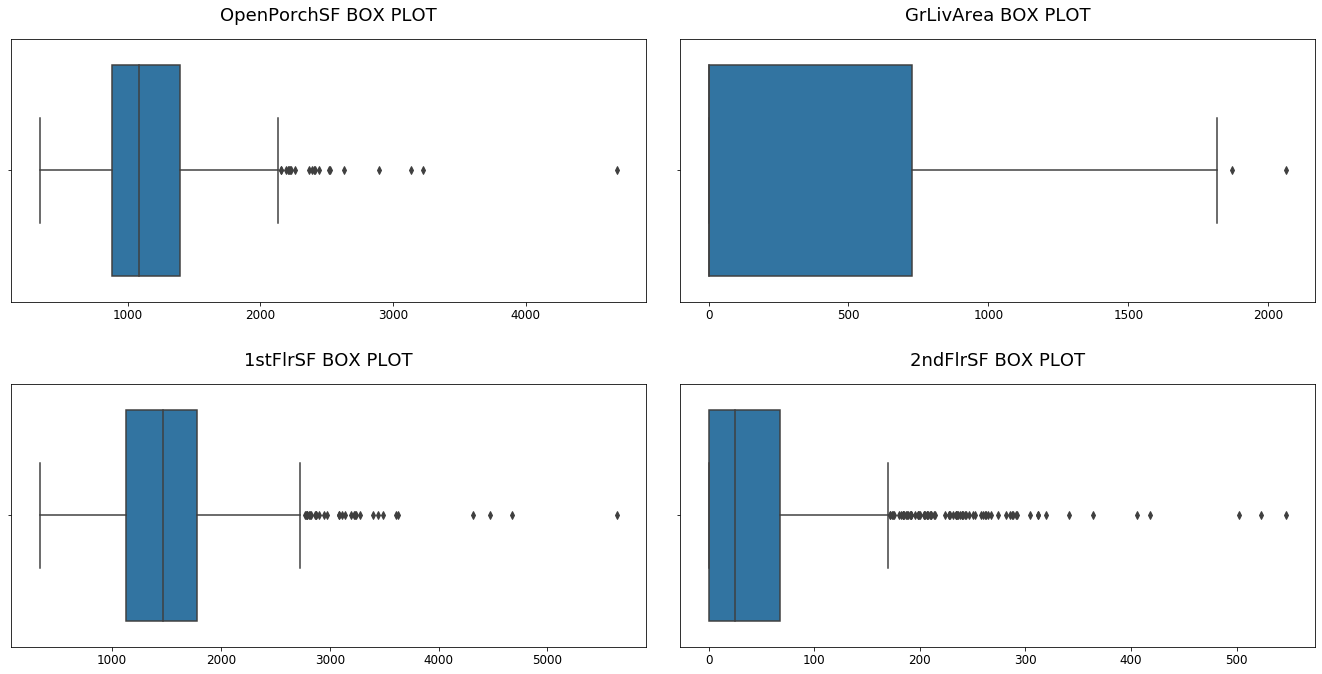

In [227]:
ASP_RATIO = (19,10)
fig_2, ax_2 = plt.subplots(2,2,figsize=ASP_RATIO)

sns.boxplot(df_house_price['1stFlrSF'], ax=ax_2[0][0])
sns.boxplot(df_house_price['2ndFlrSF'], ax=ax_2[0][1])
sns.boxplot(df_house_price['GrLivArea'], ax=ax_2[1][0])
sns.boxplot(df_house_price['OpenPorchSF'], ax=ax_2[1][1])


# sns.boxplot(df_house_price['age_porpty'])
# sns.boxplot(df_house_price['sold_age'])

label_fig_3 = {'plot_title': 'OpenPorchSF BOX PLOT',
            'pad':18,
            'ax_fontsize':14,
            't_fontsize':18,
            'labelpad':20,
            'labelsize':12,
            'ax_obj':ax_2[0][0]
           }

label_fig_4 = {'plot_title': 'GrLivArea BOX PLOT',
            'pad':18,
            'ax_fontsize':14,
            't_fontsize':18,
            'labelpad':20,
            'labelsize':12,
            'ax_obj':ax_2[0][1]
           }

label_fig_5 = {'plot_title': '1stFlrSF BOX PLOT',
            'pad':18,
            'ax_fontsize':14,
            't_fontsize':18,
            'labelpad':20,
            'labelsize':12,
            'ax_obj':ax_2[1][0]
           }

label_fig_6 = {'plot_title': '2ndFlrSF BOX PLOT',
            'pad':18,
            'ax_fontsize':14,
            't_fontsize':18,
            'labelpad':20,
            'labelsize':12,
            'ax_obj':ax_2[1][1]
           }


configure_plot(**label_fig_3);
configure_plot(**label_fig_4);
configure_plot(**label_fig_5);
configure_plot(**label_fig_6);
fig_2.tight_layout(pad=3.0)




### Correlation Analysis

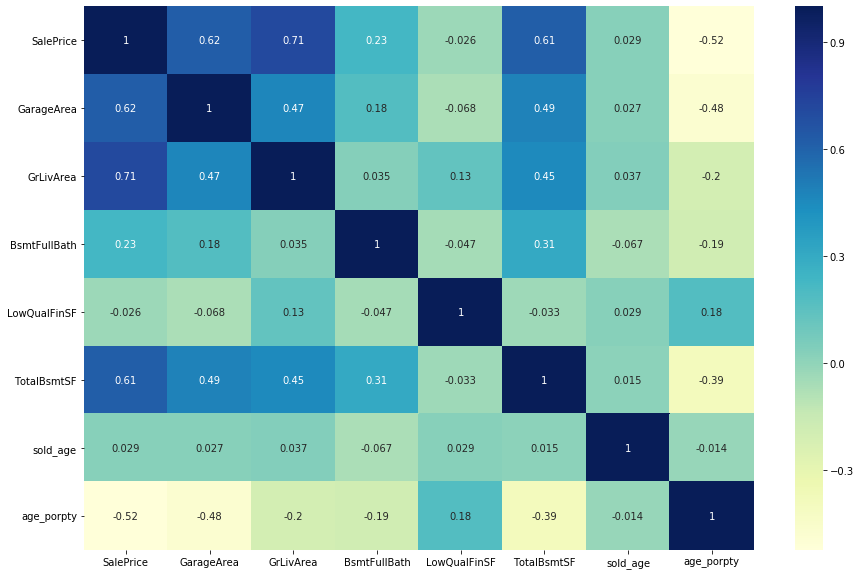

In [228]:
ASP_RATIO = (15,10)
fig_3, ax_3 = plt.subplots(figsize=ASP_RATIO)

heatmap_list = ['SalePrice','YrSold','GarageArea','GrLivArea','BsmtFullBath','YearBuilt',\
                'LowQualFinSF','TotalBsmtSF','sold_age', 'age_porpty']
sns.heatmap(df_house_price[heatmap_list].corr(),cmap="YlGnBu", annot=True, ax=ax_3);

<h1> <center><u>BIVARIATE ANALYSIS</u></center></h1> 

In [229]:
def calculate_prcnt(group):
    return str(round(((group).sum()/(df_house_price['SalePrice'].sum()))*100,2))+'%'


In [230]:
def calculate_crosstab_percnt(cols=None, rows=None, df=None):
    pvt_tbl = pd.pivot_table(data=df,index=rows, columns=cols, aggfunc=calculate_prcnt, \
                             fill_value='NA')
#     pvt_tbl.plot.bar()
    return pvt_tbl

In [231]:
calculate_crosstab_percnt(cols="YrSold", df=df_house_price[["YrSold", "SalePrice"]])

YrSold      2006    2007    2008    2009    2010
SalePrice  21.7%  23.17%  20.41%  22.96%  11.75%

In [232]:
calculate_crosstab_percnt(cols="HouseStyle", rows="SaleType", \
                          df=df_house_price[["HouseStyle","SaleType", "SalePrice"]])

SalePrice                                                   
HouseStyle    1.5Fin 1.5Unf  1Story 2.5Fin 2.5Unf  2Story SFoyer   SLvl
SaleType                                                               
COD             0.2%     NA   1.72%     NA     NA   0.31%     NA  0.11%
CWD            0.05%     NA   0.12%     NA     NA   0.08%     NA  0.06%
Con               NA     NA   0.12%     NA     NA   0.08%     NA     NA
ConLD          0.12%     NA   0.22%     NA     NA      NA  0.08%  0.05%
ConLI          0.04%     NA   0.09%     NA     NA   0.25%     NA     NA
ConLw          0.04%     NA    0.1%     NA  0.05%   0.08%     NA     NA
New               NA     NA   7.78%     NA     NA   4.87%  0.05%     NA
Oth               NA     NA   0.14%     NA     NA      NA     NA     NA
WD             7.89%  0.58%  38.07%  0.67%   0.6%  29.72%  1.76%  3.88%

In [233]:
calculate_crosstab_percnt(cols="HouseStyle", rows="BedroomAbvGr", \
                          df=df_house_price[["HouseStyle","BedroomAbvGr", "SalePrice"]])

SalePrice                                                   
HouseStyle      1.5Fin 1.5Unf  1Story 2.5Fin 2.5Unf  2Story SFoyer   SLvl
BedroomAbvGr                                                             
0                   NA     NA   0.35%     NA     NA      NA   0.1%  0.05%
1                0.26%  0.04%    2.6%     NA     NA      NA   0.3%  0.07%
2                1.17%  0.46%  16.48%     NA   0.1%   1.88%  0.82%  0.51%
3                4.22%  0.09%  26.75%  0.18%  0.31%  19.98%  0.55%  3.03%
4                2.35%     NA   1.91%  0.25%  0.16%  12.63%  0.12%  0.35%
5                0.33%     NA   0.06%  0.16%  0.08%   0.71%     NA  0.09%
6                   NA     NA    0.2%     NA     NA   0.18%     NA     NA
8                   NA     NA      NA  0.08%     NA      NA     NA     NA

In [234]:
calculate_crosstab_percnt(cols="HouseStyle", rows="KitchenAbvGr", \
                          df=df_house_price[["HouseStyle","KitchenAbvGr", "SalePrice"]])

SalePrice                                                  
HouseStyle      1.5Fin 1.5Unf  1Story 2.5Fin 2.5Unf  2Story SFoyer  SLvl
KitchenAbvGr                                                            
0                   NA     NA      NA     NA     NA      NA  0.05%    NA
1                7.87%  0.54%  47.02%  0.59%  0.52%  34.39%  1.61%  4.1%
2                0.47%  0.04%   1.35%  0.08%   0.1%   0.96%  0.23%    NA
3                   NA     NA      NA     NA  0.04%   0.04%     NA    NA

In [235]:
calculate_crosstab_percnt(cols="BedroomAbvGr", rows="KitchenAbvGr", \
                          df=df_house_price[["BedroomAbvGr","KitchenAbvGr", "SalePrice"]])

SalePrice                                                    
BedroomAbvGr         0      1       2       3       4      5      6      8
KitchenAbvGr                                                              
0                   NA     NA      NA      NA   0.05%     NA     NA     NA
1                0.41%  3.28%  20.89%  54.81%  15.99%  1.22%  0.05%     NA
2                 0.1%     NA   0.47%    0.3%   1.74%  0.22%  0.33%  0.08%
3                   NA     NA   0.08%      NA      NA     NA     NA     NA

In [236]:
calculate_crosstab_percnt(cols="BedroomAbvGr", rows="TotRmsAbvGrd", \
                          df=df_house_price[["BedroomAbvGr","TotRmsAbvGrd", "SalePrice"]])

SalePrice                                                  
BedroomAbvGr         0      1      2       3      4      5      6      8
TotRmsAbvGrd                                                            
2                   NA  0.01%     NA      NA     NA     NA     NA     NA
3                0.05%  0.59%  0.07%      NA     NA     NA     NA     NA
4                0.15%  0.98%  3.21%   0.11%  0.05%     NA     NA     NA
5                0.25%  0.33%  7.98%   6.15%  0.02%     NA     NA     NA
6                0.04%  0.48%   6.4%  17.19%  0.43%     NA     NA     NA
7                   NA  0.37%  2.72%  18.89%   2.5%     NA     NA     NA
8                   NA  0.31%  0.47%   8.37%  5.69%  0.27%     NA     NA
9                   NA  0.19%     NA   2.66%   4.1%  0.19%  0.05%     NA
10                  NA     NA  0.32%   1.28%  2.94%  0.54%   0.2%     NA
11                  NA     NA  0.27%   0.31%  1.37%  0.21%     NA     NA
12                  NA     NA     NA   0.14%  0.68%  0.23%  0.13%     NA
14                  NA     NA     NA      NA     NA     NA     NA  0.08%

In [237]:
Q1 = df_house_price[cont_cols].quantile(0.25)
Q3 = df_house_price[cont_cols].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

LotArea           4048.00
BsmtFinSF1         712.25
BsmtFinSF2           0.00
BsmtUnfSF          585.00
TotalBsmtSF        502.50
1stFlrSF           509.25
2ndFlrSF           728.00
LowQualFinSF         0.00
GrLivArea          647.25
GarageCars           1.00
GarageArea         241.50
WoodDeckSF         168.00
OpenPorchSF         68.00
EnclosedPorch        0.00
3SsnPorch            0.00
ScreenPorch          0.00
PoolArea             0.00
MiscVal              0.00
SalePrice        84025.00
dtype: float64


In [238]:
df_house_price.head()

Id MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0   1         60       RL     8450   Pave      Reg         Lvl    AllPub   
1   2         20       RL     9600   Pave      Reg         Lvl    AllPub   
2   3         60       RL    11250   Pave      IR1         Lvl    AllPub   
3   4         70       RL     9550   Pave      IR1         Lvl    AllPub   
4   5         60       RL    14260   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope  ... ScreenPorch PoolArea MiscVal MoSold YrSold  \
0    Inside       Gtl  ...           0        0       0      2   2008   
1       FR2       Gtl  ...           0        0       0      5   2007   
2    Inside       Gtl  ...           0        0       0      9   2008   
3    Corner       Gtl  ...           0        0       0      2   2006   
4       FR2       Gtl  ...           0        0       0     12   2008   

  SaleType SaleCondition SalePrice age_porpty sold_age  
0       WD        Normal    208500         17       12  
1       WD        Normal    181500         44       13  
2       WD        Normal    223500         19       12  
3       WD       Abnorml    140000        105       14  
4       WD        Normal    250000         20       12  

[5 rows x 64 columns]

### Removing outliers using IQR method

In [239]:
df_house_price = df_house_price[~((df_house_price[cont_cols] < (Q1 - 1.5 * IQR)) |(df_house_price[cont_cols] > \
                                                                (Q3 + 1.5 * IQR))).any(axis=1)]

In [240]:
df_house_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763 entries, 0 to 1455
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             763 non-null    int64   
 1   MSSubClass     763 non-null    category
 2   MSZoning       763 non-null    object  
 3   LotArea        763 non-null    int64   
 4   Street         763 non-null    object  
 5   LotShape       763 non-null    object  
 6   LandContour    763 non-null    object  
 7   Utilities      763 non-null    object  
 8   LotConfig      763 non-null    object  
 9   LandSlope      763 non-null    object  
 10  Neighborhood   763 non-null    object  
 11  Condition1     763 non-null    object  
 12  Condition2     763 non-null    object  
 13  BldgType       763 non-null    object  
 14  HouseStyle     763 non-null    object  
 15  OverallQual    763 non-null    category
 16  OverallCond    763 non-null    category
 17  YearBuilt      763 non-null    cat

<h1> <center><u>Model</u></center></h1> 

In [241]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score

In [242]:
def transform_data(df):
    le = LabelEncoder()
    col_trns=[cat_cols for cat_cols in df.select_dtypes(include=['object','category']).columns]
        
    for col in col_trns:
        col_name = 'enc_'+col
        df.loc[:,col_name] = le.fit_transform(df[col])
        del df[col]

In [243]:
def standardize_numerical_data(df):
#     filter_cols = ['MoSold', 'YrSold', 'YearBuilt', 'YearRemodAdd', 'MSSubClass', 'OverallQual', 'OverallCond']
    col_trns=[cat_cols for cat_cols in df.select_dtypes(include='int64').columns]
#     col_trns = list(filter(lambda x: x not in filter_cols, col_trns))
    df.loc[:, col_trns] = scaler.fit_transform(df[col_trns])
    
    

In [244]:
df_house_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763 entries, 0 to 1455
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             763 non-null    int64   
 1   MSSubClass     763 non-null    category
 2   MSZoning       763 non-null    object  
 3   LotArea        763 non-null    int64   
 4   Street         763 non-null    object  
 5   LotShape       763 non-null    object  
 6   LandContour    763 non-null    object  
 7   Utilities      763 non-null    object  
 8   LotConfig      763 non-null    object  
 9   LandSlope      763 non-null    object  
 10  Neighborhood   763 non-null    object  
 11  Condition1     763 non-null    object  
 12  Condition2     763 non-null    object  
 13  BldgType       763 non-null    object  
 14  HouseStyle     763 non-null    object  
 15  OverallQual    763 non-null    category
 16  OverallCond    763 non-null    category
 17  YearBuilt      763 non-null    cat

In [287]:
y = df_house_price.loc[:, 'SalePrice']
X = df_house_price.loc[:, df_house_price.columns != 'SalePrice']
scaler = StandardScaler()
standardize_numerical_data(X)
transform_data(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, \
                                                    random_state = 100)    

/home/monish/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [246]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_pred = lin_model.predict(X_train)
r2_score(y_true=y_train, y_pred=y_pred)

0.9158799644223377

In [247]:
y_test_pred = lin_model.predict(X_test)
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8907443016209817

In [248]:
from numpy import round

In [249]:
cols = X.columns
model_slopes = list(round((lin_model.coef_),3))
cols = cols.insert(0, "constant")
list(zip(cols, model_slopes))

[('constant', -385.641),
 ('Id', 5418.422),
 ('LotArea', 7014.055),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 481.502),
 ('BsmtUnfSF', 9619.871),
 ('TotalBsmtSF', 4700.003),
 ('1stFlrSF', 9977.178),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 13670.444),
 ('GrLivArea', 2399.527),
 ('BsmtFullBath', -1977.154),
 ('BsmtHalfBath', -1356.142),
 ('FullBath', -1541.983),
 ('HalfBath', -4522.818),
 ('BedroomAbvGr', -5206.552),
 ('KitchenAbvGr', 1879.2),
 ('TotRmsAbvGrd', 3798.654),
 ('Fireplaces', 1400.373),
 ('GarageCars', 4271.241),
 ('GarageArea', 376.388),
 ('WoodDeckSF', 592.741),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', -0.0),
 ('3SsnPorch', -0.0),
 ('ScreenPorch', -0.0),
 ('PoolArea', 0.0),
 ('MiscVal', -31275.087),
 ('age_porpty', 289.811),
 ('sold_age', 412.932),
 ('enc_MSSubClass', -2716.295),
 ('enc_MSZoning', 6294.499),
 ('enc_Street', -267.421),
 ('enc_LotShape', -1009.563),
 ('enc_LandContour', -0.0),
 ('enc_Utilities', -193.442),
 ('enc_LotConfig', 972.89),
 ('enc_LandSlope', 125.83),
 (

In [250]:
lasso_lin_model = Lasso(alpha=0.001)
lasso_lin_model.fit(X_train, y_train)

# predict
y_train_pred = lasso_lin_model.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso_lin_model.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.9158796034455129
0.8907232225736254


/home/monish/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75706669799.45268, tolerance: 180182473.8723133
  positive)


In [251]:
lasso_lin_model.coef_

array([  -386.51198426,   5419.1694604 ,  12128.81408063,      0.        ,
         5744.35538175,   5640.48083441,  11126.23793037,  18583.24089028,
            0.        ,   5177.88774932,   2399.71506642,  -1977.9454035 ,
        -1361.57623554,  -1542.23867644,  -4524.31029031,  -5220.49075946,
         1881.39981387,   3800.93382507,   1399.91150463,   4270.35217136,
          374.45334863,    593.33743358,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        , -30659.85229068,
          600.72274961,    416.8505701 ,  -2720.79115522,   6265.15760711,
         -266.70116696,  -1017.32028172,      0.        ,   -192.26722515,
          961.42877513,    125.33713263,    -69.34192477,  -9883.22297969,
        -2467.18751903,    -41.99486996,   8382.63693485,   6208.78611206,
         -725.79161133,     45.24275963,    732.08070483,   8921.69522516,
         -894.53504653,    607.5166403 ,  -2801.31042055,  -2554.40633067,
         1776.78947151,  

In [252]:
model_parameters = list(lasso_lin_model.coef_)
model_parameters.insert(0, lasso_lin_model.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 190057.157),
 ('Id', -386.512),
 ('LotArea', 5419.169),
 ('BsmtFinSF1', 12128.814),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 5744.355),
 ('TotalBsmtSF', 5640.481),
 ('1stFlrSF', 11126.238),
 ('2ndFlrSF', 18583.241),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 5177.888),
 ('BsmtFullBath', 2399.715),
 ('BsmtHalfBath', -1977.945),
 ('FullBath', -1361.576),
 ('HalfBath', -1542.239),
 ('BedroomAbvGr', -4524.31),
 ('KitchenAbvGr', -5220.491),
 ('TotRmsAbvGrd', 1881.4),
 ('Fireplaces', 3800.934),
 ('GarageCars', 1399.912),
 ('GarageArea', 4270.352),
 ('WoodDeckSF', 374.453),
 ('OpenPorchSF', 593.337),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('age_porpty', -30659.852),
 ('sold_age', 600.723),
 ('enc_MSSubClass', 416.851),
 ('enc_MSZoning', -2720.791),
 ('enc_Street', 6265.158),
 ('enc_LotShape', -266.701),
 ('enc_LandContour', -1017.32),
 ('enc_Utilities', 0.0),
 ('enc_LotConfig', -192.267),
 ('enc_LandSlope', 961.429),


In [253]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 30, 40, 80, 100, 200,
                   300,500,900,1000, 2000, 5000, 8000, 10000]}

# grid search
# lasso model
model = Lasso(max_iter=10000, tol=0.1)
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed:    1.7s finished
/home/monish/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=KFold(n_splits=10, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=10000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.1, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 30, 40, 80,
                                   100, 200, 300, 500, 900, 1000, 2000, 5000,
                                   8000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [255]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.006249      0.000923         0.002353        0.000467         0.1   
1       0.004021      0.000172         0.001566        0.000028         0.2   
2       0.003990      0.000127         0.001621        0.000117         0.5   
3       0.004026      0.000130         0.001549        0.000013           1   
4       0.004023      0.000078         0.001705        0.000170           2   

           params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.1}           0.914450           0.898540           0.815280   
1  {'alpha': 0.2}           0.914454           0.898527           0.815286   
2  {'alpha': 0.5}           0.914467           0.898490           0.815302   
3    {'alpha': 1}           0.914483           0.898425           0.815330   
4    {'alpha': 2}           0.914514           0.898294           0.815389   

   split3_test_score  ...  split2_train_score  split3_train_score  \
0           0.707868  ...            0.916077            0.920457   
1           0.707886  ...            0.916078            0.920459   
2           0.707939  ...            0.916080            0.920463   
3           0.708027  ...            0.916085            0.920471   
4           0.708187  ...            0.916093            0.920484   

   split4_train_score  split5_train_score  split6_train_score  \
0            0.907160            0.902281            0.910142   
1            0.907162            0.902283            0.910144   
2            0.907167            0.902290            0.910149   
3            0.907175            0.902301            0.910158   
4            0.907191            0.902323            0.910175   

   split7_train_score  split8_train_score  split9_train_score  \
0            0.903592            0.908348            0.907126   
1            0.903593            0.908350            0.907127   
2            0.903595            0.908356            0.907132   
3            0.903598            0.908365            0.907140   
4            0.903604            0.908383            0.907155   

   mean_train_score  std_train_score  
0          0.908942         0.005214  
1          0.908944         0.005214  
2          0.908948         0.005213  
3          0.908956         0.005213  
4          0.908971         0.005212  

[5 rows x 31 columns]

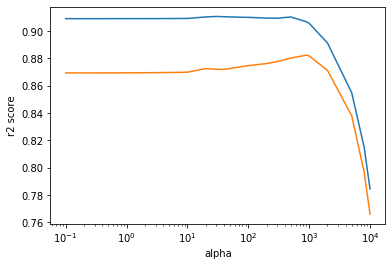

In [256]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

### Optimal Alpha Value

In [257]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 900}
0.8822726398437073


In [288]:
lasso_lin_model = Lasso(alpha=900)
lasso_lin_model.fit(X_train, y_train)

# predict
y_train_pred = lasso_lin_model.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso_lin_model.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.9050978749219507
0.8869858221128809


### Doubling alpha value

In [290]:
lasso_lin_model = Lasso(alpha=1800)
lasso_lin_model.fit(X_train, y_train)

y_train_pred = lasso_lin_model.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso_lin_model.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8949244082408342
0.8810304901105435


In [291]:
model_parameters = list(lasso_lin_model.coef_)
model_parameters.insert(0, lasso_lin_model.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 78150.212),
 ('Id', -0.0),
 ('LotArea', 4084.576),
 ('BsmtFinSF1', 6375.205),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 4619.111),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 18022.586),
 ('BsmtFullBath', 1260.424),
 ('BsmtHalfBath', -0.0),
 ('FullBath', 0.0),
 ('HalfBath', -0.0),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', -1063.652),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', 3982.116),
 ('GarageCars', 0.0),
 ('GarageArea', 4857.884),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('age_porpty', -0.0),
 ('sold_age', 0.0),
 ('enc_MSSubClass', -874.767),
 ('enc_MSZoning', -0.0),
 ('enc_Street', 0.0),
 ('enc_LotShape', -394.206),
 ('enc_LandContour', -0.0),
 ('enc_Utilities', 0.0),
 ('enc_LotConfig', -0.0),
 ('enc_LandSlope', 0.0),
 ('enc_Neighborhood', 194.071),
 ('enc_Condition1', -0.0),
 ('enc_Condition2', -0.0),
 (

In [262]:
drop_5_most_imp_predctrs= ['GarageArea' ,'TotalBsmtSF', 'BsmtFinSF1', 'enc_OverallQual', 'GrLivArea']


In [275]:
X_train = X_train.drop(drop_5_most_imp_predctrs, axis=1)

In [278]:
X_test = X_test.drop(drop_5_most_imp_predctrs, axis=1)

In [279]:
X_train.shape

(534, 58)

In [285]:
# lasso_lin_model = Lasso(alpha=900)
# lasso_lin_model.fit(X_train, y_train)

# # predict
# y_train_pred = lasso_lin_model.predict(X_train)
# print(r2_score(y_true=y_train, y_pred=y_train_pred))
# y_test_pred = lasso_lin_model.predict(X_test)
# print(r2_score(y_true=y_test, y_pred=y_test_pred))

### Ridge Model

In [137]:
ridge_lin_model = Ridge(alpha=0.001)
ridge_lin_model.fit(X_train, y_train)


y_train_pred = ridge_lin_model.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge_lin_model.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.9158799640621003
0.8907441354203636


In [138]:
ridge_lin_model.coef_

array([  -385.6903791 ,   5418.35216984,   7014.11697684,      0.        ,
          481.54060345,   9620.00188833,   4699.78044967,   9977.18810766,
            0.        ,  13670.28480001,   2399.5470516 ,  -1977.10457367,
        -1356.22207667,  -1541.9747404 ,  -4522.8620427 ,  -5206.76743762,
         1879.28290629,   3798.74266201,   1400.41200286,   4271.26336388,
          376.37159781,    592.77751889,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        , -31257.26339049,
          289.79577597,    413.02151491,  -2716.47242952,   6286.64609965,
         -267.45724831,  -1009.78498224,      0.        ,   -193.43935265,
          972.56618988,    125.81248778,    -64.93212148,  -9947.82302698,
        -2457.31684964,    -33.29656717,   8389.28642348,   6201.57756098,
         -751.14858489,     45.81702012,    731.62196048,   8886.11652349,
         -893.95446287,    607.2811562 ,  -2800.7927697 ,  -2560.29340285,
         1776.57630221,  

In [139]:
model_parameters_ridge = list(ridge_lin_model.coef_)
model_parameters_ridge.insert(0, ridge_lin_model.intercept_)
model_parameters_ridge = [round(x, 3) for x in model_parameters_ridge]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters_ridge))

[('constant', 192155.252),
 ('Id', -385.69),
 ('LotArea', 5418.352),
 ('BsmtFinSF1', 7014.117),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 481.541),
 ('TotalBsmtSF', 9620.002),
 ('1stFlrSF', 4699.78),
 ('2ndFlrSF', 9977.188),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 13670.285),
 ('BsmtFullBath', 2399.547),
 ('BsmtHalfBath', -1977.105),
 ('FullBath', -1356.222),
 ('HalfBath', -1541.975),
 ('BedroomAbvGr', -4522.862),
 ('KitchenAbvGr', -5206.767),
 ('TotRmsAbvGrd', 1879.283),
 ('Fireplaces', 3798.743),
 ('GarageCars', 1400.412),
 ('GarageArea', 4271.263),
 ('WoodDeckSF', 376.372),
 ('OpenPorchSF', 592.778),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('age_porpty', -31257.263),
 ('sold_age', 289.796),
 ('enc_MSSubClass', 413.022),
 ('enc_MSZoning', -2716.472),
 ('enc_Street', 6286.646),
 ('enc_LotShape', -267.457),
 ('enc_LandContour', -1009.785),
 ('enc_Utilities', 0.0),
 ('enc_LotConfig', -193.439),
 ('enc_LandSlope', 972.566),
 

In [140]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 4)


params = {'alpha': [0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 30, 40, 80, 100, 200,
                   300,500,900,1000, 2000, 5000, 8000, 10000]}

model_ridge = Ridge(max_iter=10000, tol=0.1)
model_cv_ridge = GridSearchCV(estimator = model_ridge, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv_ridge.fit(X_train, y_train) 

Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed:    2.4s finished
/home/monish/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=KFold(n_splits=10, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=10000, normalize=False, random_state=None,
                             solver='auto', tol=0.1),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 30, 40, 80,
                                   100, 200, 300, 500, 900, 1000, 2000, 5000,
                                   8000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [141]:
cv_results_ridge = pd.DataFrame(model_cv_ridge.cv_results_)
cv_results_ridge.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.006998      0.000950         0.002793        0.000152         0.1   
1       0.009804      0.005759         0.003064        0.000571         0.2   
2       0.007866      0.000964         0.002991        0.000475         0.5   
3       0.006974      0.003079         0.002288        0.000479           1   
4       0.004636      0.000564         0.002145        0.000367           2   

           params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.1}           0.918252           0.899721           0.834337   
1  {'alpha': 0.2}           0.918250           0.898812           0.834326   
2  {'alpha': 0.5}           0.918217           0.896616           0.834272   
3    {'alpha': 1}           0.918124           0.894214           0.834193   
4    {'alpha': 2}           0.917909           0.891739           0.834158   

   split3_test_score  ...  split2_train_score  split3_train_score  \
0           0.728303  ...            0.923289            0.927152   
1           0.728715  ...            0.923279            0.927142   
2           0.729831  ...            0.923232            0.927086   
3           0.731407  ...            0.923135            0.926962   
4           0.733926  ...            0.922945            0.926707   

   split4_train_score  split5_train_score  split6_train_score  \
0            0.914625            0.914930            0.918109   
1            0.914616            0.914921            0.918098   
2            0.914571            0.914876            0.918046   
3            0.914472            0.914771            0.917937   
4            0.914271            0.914546            0.917728   

   split7_train_score  split8_train_score  split9_train_score  \
0            0.907596            0.917384            0.916286   
1            0.907580            0.917375            0.916276   
2            0.907509            0.917331            0.916226   
3            0.907378            0.917233            0.916122   
4            0.907148            0.917027            0.915921   

   mean_train_score  std_train_score  
0          0.916949         0.005011  
1          0.916939         0.005011  
2          0.916889         0.005014  
3          0.916785         0.005015  
4          0.916582         0.005010  

[5 rows x 31 columns]

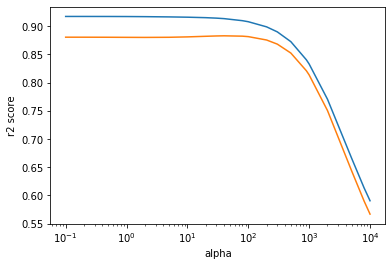

In [142]:
cv_results_ridge['param_alpha'] = cv_results_ridge['param_alpha'].astype('float32')
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_train_score'])
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

## Optimal Value of alpha

In [ ]:
print(model_cv_ridge.best_params_)
print(model_cv_ridge.best_score_)

In [185]:

ridge_lin_model = Ridge(alpha=40)
ridge_lin_model.fit(X_train, y_train)

# predict
y_train_pred = ridge_lin_model.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge_lin_model.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.9124221377966241
0.8874398516512059


### Doubling alpha value

In [189]:

ridge_lin_model = Ridge(alpha=80)
ridge_lin_model.fit(X_train, y_train)

# predict
y_train_pred = ridge_lin_model.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge_lin_model.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.9092504292517926
0.8847138049573976


In [195]:
model_parameters_ridge = list(ridge_lin_model.coef_)
model_parameters_ridge.insert(0, ridge_lin_model.intercept_)
# model_parameters_ridge = [round(x, 8) for x in model_parameters_ridge]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters_ridge))

[('constant', 95925.45612679895),
 ('Id', -446.24887857209814),
 ('LotArea', 4736.051627278033),
 ('BsmtFinSF1', 5604.681349378346),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', -379.8235532053484),
 ('TotalBsmtSF', 6678.7476953250325),
 ('1stFlrSF', 4762.736373150842),
 ('2ndFlrSF', 6435.2384917456375),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 10129.542187928726),
 ('BsmtFullBath', 2627.403165936309),
 ('BsmtHalfBath', -1238.41874542957),
 ('FullBath', 500.62632936766664),
 ('HalfBath', 216.1048061277201),
 ('BedroomAbvGr', -2638.74747641098),
 ('KitchenAbvGr', -3865.963588693854),
 ('TotRmsAbvGrd', 3021.193805360143),
 ('Fireplaces', 4278.829478727834),
 ('GarageCars', 2336.8224580495016),
 ('GarageArea', 4261.93533527835),
 ('WoodDeckSF', 989.452246519094),
 ('OpenPorchSF', 1256.0906028122567),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('age_porpty', -809.7356171161642),
 ('sold_age', 218.9182258538522),
 ('enc_MSSubClass', 20